In [1]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<h1>Specify Mass</h1>

In [2]:
m = 200

<h1>Configuration Stuff Here</h1>

In [3]:
ifSave = True
savePath = "../plot_files/06April2024_m"+str(m)+"_v3/"

In [4]:
ifCut = True

In [5]:
ifTune = False

TuneCut = {}
 
if m == 200:
    TuneCut = {
    'beamSpillBegin': 367 - 16
    , 'beamSpillEnd': 367 + 1600 + 16
    , 'crumbs': 0 
    , 'Muon' : 0.04
    , 'Proton' : 0.96
    , 'Pion' : 0.86
    , 'Electron' : 0.96
    , 'Photon' : 0.04
    , 'ShowerEnergy': 20 
    , 'PE': 2500
    , 'OneShowerFracMore': -0.1 #0
    , 'OneShowerFracLess': 0.44
    , 'TwoShowerFracMore': 0 #0
    , 'TwoShowerFracLess': 0.44    
    , 'OneShowerTheta': 20#19 #13.2 #19
    , 'TwoShowerTheta': 30 #30 #27 #16.8 #25
    }

<h1> Read in PKL Dataframe </h1>

<h3> HNL </h3>

In [6]:
df_hnl = pd.DataFrame()

for i in range(0, 4):
    hnl_path = "../pkl_files/v3_April2024/hnl_m"+str(m)+"_slc_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    df_hnl = pd.concat((df_hnl, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_hnl = pd.DataFrame()

for i in range(0, 4):
    hnl_path = "../pkl_files/v3_April2024/hnl_m"+str(m)+"_subrun_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_hnl = pd.concat((dfsubrun_hnl, df), ignore_index=True)
    file.close()

../pkl_files/v3_April2024/hnl_m200_slc_0.pkl
../pkl_files/v3_April2024/hnl_m200_slc_1.pkl
../pkl_files/v3_April2024/hnl_m200_slc_2.pkl
../pkl_files/v3_April2024/hnl_m200_slc_3.pkl
../pkl_files/v3_April2024/hnl_m200_subrun_0.pkl
../pkl_files/v3_April2024/hnl_m200_subrun_1.pkl
../pkl_files/v3_April2024/hnl_m200_subrun_2.pkl
../pkl_files/v3_April2024/hnl_m200_subrun_3.pkl


<h3> Rcokbox Neutrino </h3>

In [7]:
df_nu = pd.DataFrame()

for i in range(0, 51):
    nu_path = "../pkl_files/v3_April2024/rockbox_slc_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    df_nu = pd.concat((df_nu, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_nu = pd.DataFrame()

for i in range(0, 51):
    nu_path = "../pkl_files/v3_April2024/rockbox_subrun_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_nu = pd.concat((dfsubrun_nu, df), ignore_index=True)
    file.close()

../pkl_files/v3_April2024/rockbox_slc_0.pkl
../pkl_files/v3_April2024/rockbox_slc_1.pkl
../pkl_files/v3_April2024/rockbox_slc_2.pkl
../pkl_files/v3_April2024/rockbox_slc_3.pkl
../pkl_files/v3_April2024/rockbox_slc_4.pkl
../pkl_files/v3_April2024/rockbox_slc_5.pkl
../pkl_files/v3_April2024/rockbox_slc_6.pkl
../pkl_files/v3_April2024/rockbox_slc_7.pkl
../pkl_files/v3_April2024/rockbox_slc_8.pkl
../pkl_files/v3_April2024/rockbox_slc_9.pkl
../pkl_files/v3_April2024/rockbox_slc_10.pkl
../pkl_files/v3_April2024/rockbox_slc_11.pkl
../pkl_files/v3_April2024/rockbox_slc_12.pkl
../pkl_files/v3_April2024/rockbox_slc_13.pkl
../pkl_files/v3_April2024/rockbox_slc_14.pkl
../pkl_files/v3_April2024/rockbox_slc_15.pkl
../pkl_files/v3_April2024/rockbox_slc_16.pkl
../pkl_files/v3_April2024/rockbox_slc_17.pkl
../pkl_files/v3_April2024/rockbox_slc_18.pkl
../pkl_files/v3_April2024/rockbox_slc_19.pkl
../pkl_files/v3_April2024/rockbox_slc_20.pkl
../pkl_files/v3_April2024/rockbox_slc_21.pkl
../pkl_files/v3_Apri

<h3> NCPi0 </h3>

In [8]:
df_ncpi0 = pd.DataFrame()

for i in range(0, 8):
    nu_path = "../pkl_files/v3_April2024/ncpi0_slc_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    df_ncpi0 = pd.concat((df_ncpi0, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_ncpi0 = pd.DataFrame()

for i in range(0, 8):
    nu_path = "../pkl_files/v3_April2024/ncpi0_subrun_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_ncpi0 = pd.concat((dfsubrun_ncpi0, df), ignore_index=True)
    file.close()

../pkl_files/v3_April2024/ncpi0_slc_0.pkl
../pkl_files/v3_April2024/ncpi0_slc_1.pkl
../pkl_files/v3_April2024/ncpi0_slc_2.pkl
../pkl_files/v3_April2024/ncpi0_slc_3.pkl
../pkl_files/v3_April2024/ncpi0_slc_4.pkl
../pkl_files/v3_April2024/ncpi0_slc_5.pkl
../pkl_files/v3_April2024/ncpi0_slc_6.pkl
../pkl_files/v3_April2024/ncpi0_slc_7.pkl
../pkl_files/v3_April2024/ncpi0_subrun_0.pkl
../pkl_files/v3_April2024/ncpi0_subrun_1.pkl
../pkl_files/v3_April2024/ncpi0_subrun_2.pkl
../pkl_files/v3_April2024/ncpi0_subrun_3.pkl
../pkl_files/v3_April2024/ncpi0_subrun_4.pkl
../pkl_files/v3_April2024/ncpi0_subrun_5.pkl
../pkl_files/v3_April2024/ncpi0_subrun_6.pkl
../pkl_files/v3_April2024/ncpi0_subrun_7.pkl


<h3> Intime Cosmics </h3>

In [9]:
df_cos = pd.DataFrame()

for i in range(0, 3):
    cos_path = "../pkl_files/v3_April2024/intime_cosmic_slc_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    df_cos = pd.concat((df_cos, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_cos = pd.DataFrame()

for i in range(0, 3):
    cos_path = "../pkl_files/v3_April2024/intime_cosmic_subrun_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_cos = pd.concat((dfsubrun_cos, df), ignore_index=True)
    file.close()

../pkl_files/v3_April2024/intime_cosmic_slc_0.pkl
../pkl_files/v3_April2024/intime_cosmic_slc_1.pkl
../pkl_files/v3_April2024/intime_cosmic_slc_2.pkl
../pkl_files/v3_April2024/intime_cosmic_subrun_0.pkl
../pkl_files/v3_April2024/intime_cosmic_subrun_1.pkl
../pkl_files/v3_April2024/intime_cosmic_subrun_2.pkl


<h1>Some Scaling Voodoo</h1>

<h3>HNL</h3>

In [10]:
true_signals = 1
true_nonfv_signals = 1
total_true_signals = 1
start_signals = 1
start_nonfv_signals = 1
total_start_signals = 1
    
if m == 200:
    true_signals = 14560 + 13929 + 12594 + 573
    true_nonfv_signals = 6440 + 6071 + 5506 + 277
    total_true_signals = 21000 + 20000 + 18100 + 850
    start_signals = 13871 + 13237 + 12007 + 545
    start_nonfv_signals = 5400 + 5021 + 4601 + 229
    total_start_signals = 19271 + 18258 + 16608 + 774

In [11]:
#Sanity Check: ifScale == 1 i.e. Umu = 1e-7 and 3 years POT
#true counts ~1.5k
#start counts ~1.4k
scale_pot_hnl, hnl_spills = calc_scaling_pot(dfsubrun_hnl, df_hnl, ifScale = 1)

true_signals = true_signals * scale_pot_hnl
true_nonfv_signals = true_nonfv_signals * scale_pot_hnl
total_true_signals = total_true_signals * scale_pot_hnl

start_signals = start_signals * scale_pot_hnl
start_nonfv_signals = start_nonfv_signals * scale_pot_hnl
total_start_signals = total_start_signals * scale_pot_hnl

true_counts = total_true_signals
start_counts = total_start_signals
print("true counts = " + str(true_counts))
print("start counts = " + str(start_counts))

-----------------------------------------------
sample pot = 40474264071270849052672.000000
sample spill = 59950.000000
target spill = 1481.188142
scale pot factor = 0.024707
-----------------------------------------------
true counts = 1481.1881420359975
start counts = 1356.6892755185766


In [12]:
simU = 1 #already squared

if m == 140:
    simU = 1e-5
if m == 200:
    simU = 1e-7
if m == 240:
    simU = 1e-7
    
scaleHNLPlot = 1

if m ==140:    
    scaleHNLPlot = 3.7
if m ==200:    
    scaleHNLPlot = 100
if m ==240:    
    scaleHNLPlot = 17.2

In [13]:
plotU = getUfromScaleFactor(simU, scaleHNLPlot)

true_counts = true_counts * scaleHNLPlot
start_counts =  start_counts * scaleHNLPlot

print("Sim Umu = " +str(simU))
print("Scale Umu by " + str(scaleHNLPlot))
print("Scaled Umu = " + str(plotU))

print("Scaled true counts = " + str(true_counts))
print("Scaled start counts = " + str(start_counts))

Sim Umu = 1e-07
Scale Umu by 100
Scaled Umu = 1e-06
Scaled true counts = 148118.81420359976
Scaled start counts = 135668.92755185766


In [14]:
scale_pot_hnl, hnl_spill = calc_scaling_pot(dfsubrun_hnl, df_hnl, ifScale = scaleHNLPlot)
df_hnl['simU'] = simU
df_hnl['scaledU'] = plotU

-----------------------------------------------
sample pot = 404742640712708521984.000000
sample spill = 59950.000000
target spill = 148118.814204
scale pot factor = 2.470706
-----------------------------------------------


<h3>Rock Box Neutrino</h3>

In [15]:
scale_pot_nu, nu_spill = calc_scaling_pot(dfsubrun_nu, df_nu)


-----------------------------------------------
sample pot = 45116209438504026112.000000
sample spill = 2995500.000000
target spill = 66395205.565375
scale pot factor = 22.164983
-----------------------------------------------


In [16]:
#check if an event contains a slice true event == 3 
def has3(lst):
    if 3 in lst:
        return True
    return False

In [17]:
#Separate at event-level (NOT slice!) event type == 3 i.e. NCPi0 in FV

dfnu_event =  pd.DataFrame()
dfnu_event = df_nu.groupby(['run','subrun', 'event','scale_pot'])["slc_true_event_type"].apply(list).reset_index(name = 'list')

dfnu_event['has3'] = np.vectorize(has3)(dfnu_event.list)

print("# of NCPi0 events in rockbox = {}".format(len(dfnu_event[dfnu_event['has3'] == True])))
print("# of other events in rockbox = {}".format(len(dfnu_event[dfnu_event['has3'] == False])))

dfnu_YesNCpi0 = dfnu_event[dfnu_event['has3'] == True]
dfnu_NoNCpi0 = dfnu_event[dfnu_event['has3'] == False]

del dfnu_event

# of NCPi0 events in rockbox = 12934
# of other events in rockbox = 504570


In [18]:
#remove event type == 3 from rockbox sample
dfnu_NoNCpi0 = dfnu_NoNCpi0[['run','subrun', 'event']]

df_nu_NoNCpi0 = df_nu.merge(dfnu_NoNCpi0, on = ['run','subrun', 'event'])

del dfnu_NoNCpi0

print(len(df_nu_NoNCpi0[df_nu_NoNCpi0['slc_true_event_type'] == 3]))


#keep only event type == 3 in rockbox
dfnu_YesNCpi0 = dfnu_YesNCpi0[['run','subrun', 'event']]

df_nu_YesNCpi0 = df_nu.merge(dfnu_YesNCpi0, on = ['run','subrun', 'event'])

del dfnu_YesNCpi0

print(len(df_nu_YesNCpi0[df_nu_YesNCpi0['slc_true_event_type'] == 3]))
print(len(df_nu_YesNCpi0[df_nu_YesNCpi0['slc_true_event_type'] != 3]))

0
45325
30779


In [19]:
#Separate at event-level (NOT slice!) event type == 3 i.e. NCPi0 in FV
dfncpi0_event =  pd.DataFrame()
dfncpi0_event = df_ncpi0.groupby(['run','subrun', 'event'])["slc_true_event_type"].apply(list).reset_index(name = 'list')

dfncpi0_event['has3'] = np.vectorize(has3)(dfncpi0_event.list)
dfncpi0_event = dfncpi0_event[dfncpi0_event['has3'] == True]

print("# of NCPi0 events in ncpi0 filter sample = {}".format(len(dfncpi0_event[dfncpi0_event['has3'] == True])))

# of NCPi0 events in ncpi0 filter sample = 29492


In [20]:
#keep only event type == 3 in NCpi0 sample
dfncpi0_event = dfncpi0_event[['run','subrun', 'event']]
df_ncpi0 = df_ncpi0.merge(dfncpi0_event, on = ['run','subrun', 'event'])

del dfncpi0_event

print(len(df_ncpi0[df_ncpi0['slc_true_event_type'] != 3]))
print(len(df_ncpi0[df_ncpi0['slc_true_event_type'] == 3]))

70290
103151


In [21]:
#merge NCpi0 from rockbox and filter sample into 1

df_ncpi0 = pd.concat([df_nu_YesNCpi0, df_ncpi0])

In [22]:
#calculate the POT per event for rockbox sample
total_pot = df_nu['scale_pot'].sum() 
pot_YesNCPi0 = df_nu_YesNCpi0['scale_pot'].sum() 
pot_NoNCPi0 = df_nu_NoNCpi0['scale_pot'].sum()

print("total pot = " + str(total_pot))
print("Yes + No NCPi0 POT = " + str(pot_YesNCPi0 +  pot_NoNCPi0))
print("pot Yes NCPI0 = " + str(pot_YesNCPi0))
print("pot No NCPI0 = " + str(pot_NoNCPi0))

total pot = 51138272.22441661
Yes + No NCPi0 POT = 51138272.224416584
pot Yes NCPI0 = 1686843.8405432554
pot No NCPI0 = 49451428.38387333


In [23]:
#calculate the POT per event for NCPi0 sample
nEvent_NCPi0Only = len(df_ncpi0['slc_id'])
nEvent_nuNCPi0 = len(df_nu_YesNCpi0['slc_id'])

scale_pot_NCPi0 =  nEvent_nuNCPi0 / nEvent_NCPi0Only * (pot_YesNCPi0/nEvent_nuNCPi0)

df_ncpi0['scale_pot'] = scale_pot_NCPi0

print(nEvent_NCPi0Only)
print(nEvent_nuNCPi0)
print(scale_pot_NCPi0)

249545
76104
6.759677976089504


In [24]:
#concat rockbox with ncpi0 
df_new_nu = pd.concat([df_nu_NoNCpi0, df_ncpi0])
df_new_nu = df_new_nu.reset_index()

df_nu = df_new_nu

In [25]:
del df_new_nu
del df_nu_NoNCpi0
del df_nu_YesNCpi0
del df_ncpi0

<h3>Intime Cosmics</h3>

In [26]:
scale_pot_cosmics = calc_scaling_spill(dfsubrun_cos, df_cos, hnl_spill, nu_spill)

-----------------------------------------------
target total spill = 200000000.0
hnl + nu spill = 66543324.379578896
target intime spill = 133456675.62042111
scale pot factor = 13.555782185923933
-----------------------------------------------


In [27]:
del dfsubrun_nu
del dfsubrun_hnl
del dfsubrun_cos

<h1>Combine FV and Non-FV HNL</h1>

In [28]:
df_hnl['slc_true_event_type'][df_hnl['slc_true_event_type'] == 1] = 0
df_nu['slc_true_event_type'][df_nu['slc_true_event_type'] == 1] = 0
df_cos['slc_true_event_type'][df_cos['slc_true_event_type'] == 1] = 0

<h1> Make Beam Bucket - Post Non-clear cosmics </h1>

In [29]:
label = str(m) + ' MeV HNL ${\pi}^{0}$' + '\n' + '|U$_{{\mu 4}}$|$^{{2}}$ = ' +str(sci_notation(plotU,0,0))
print(label)

200 MeV HNL ${\pi}^{0}$
|U$_{{\mu 4}}$|$^{{2}}$ = $1\times10^{-6}$


<Figure size 432x288 with 0 Axes>

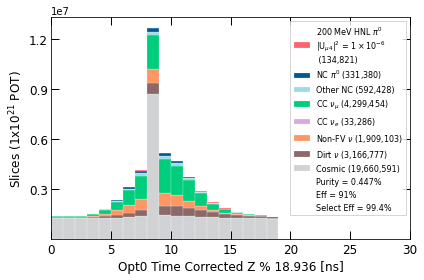

In [30]:
width = 18.936

df_hnl['mod_t'] = df_hnl['slc_opt0_time_corrected_Z_pandora']%width
df_nu['mod_t'] = df_nu['slc_opt0_time_corrected_Z_pandora']%width
df_cos['mod_t'] = df_cos['slc_opt0_time_corrected_Z_pandora']%width
#----------------------------------------------
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',
                    ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_post_nonclearcosmics.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Save Purity and Eff </h3>

In [31]:
purity_arr, eff_arr, cut_arr = [], [], []

In [32]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)


purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Clear Cosmics Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4]
[99.4]
['Clear Cosmics Cut']


<h1> Beam Spill </h1>

<Figure size 432x288 with 0 Axes>

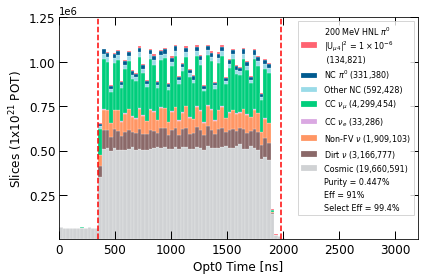

In [33]:
light_speed_cm_us = 29979.2458 # cm/ns

df_hnl['slc_opt0_time'] = df_hnl['slc_opt0_time_corrected_Z_pandora'] + df_hnl['slc_vtx_z']/light_speed_cm_us
df_nu['slc_opt0_time'] = df_nu['slc_opt0_time_corrected_Z_pandora'] + df_nu['slc_vtx_z']/light_speed_cm_us
df_cos['slc_opt0_time'] = df_cos['slc_opt0_time_corrected_Z_pandora'] + df_cos['slc_vtx_z']/light_speed_cm_us
#-----------------------------------#
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_time', 
                    xmin = 0, xmax = 3200, xnbin = 100,
                    xtitle = 'Opt0 Time [ns]',
                    ifAddLegend = True, addLegend = label
                    )

plt.axvline(x = TuneCut['beamSpillBegin'], c = 'r', linestyle = '--', lw = 1.5)
plt.axvline(x = TuneCut['beamSpillEnd'], c = 'r', linestyle = '--', lw = 1.5)

plt.ylim(0, 1.25e6)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beamspill.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Apply Cut</h3>

In [34]:
if ifCut:
    df_hnl = cutBeamGate(df_hnl, gateBegin = TuneCut['beamSpillBegin'], gateEnd = TuneCut['beamSpillEnd'])
    df_nu = cutBeamGate(df_nu, gateBegin = TuneCut['beamSpillBegin'], gateEnd = TuneCut['beamSpillEnd'])
    df_cos = cutBeamGate(df_cos, gateBegin = TuneCut['beamSpillBegin'], gateEnd = TuneCut['beamSpillEnd'])

<h3>Save Purity/Eff</h3>

In [35]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Beam Spill")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5]
[99.4, 96.1]
['Clear Cosmics Cut', 'Beam Spill']


<h1> Make Beam Bucket - Post Beam Spill</h1>

<Figure size 432x288 with 0 Axes>

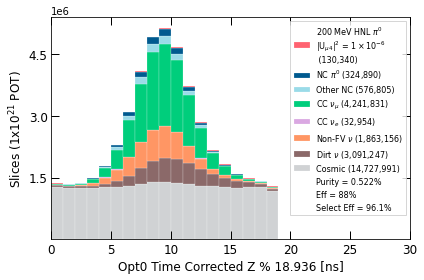

In [36]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',
                    ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_post_beamspill.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> CRUMBS </h1>

<Figure size 432x288 with 0 Axes>

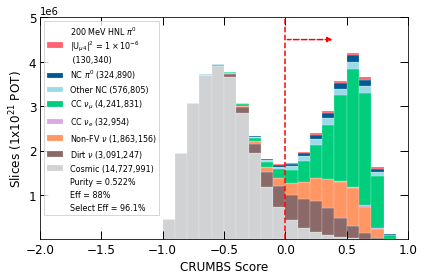

In [37]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_crumbs_score', 
                    xmin = -2, xmax =1, xnbin = 30,
                    xtitle = 'CRUMBS Score',
                    ifAddLegend = True, addLegend = label
                    )

plt.axvline(x = TuneCut['crumbs'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(0, 4.5e6), xytext=(0.4, 4.5e6)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))

plt.ylim(0, 5e6)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"crumbs_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [38]:
if ifTune:
    vary_crumbsScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    if ifSave:
        plt.savefig(savePath+"/crumbs_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [39]:
score = TuneCut['crumbs']

print(score)

if ifCut:
    df_hnl = cutCosmics(df_hnl, crumbsScore = score)
    df_nu = cutCosmics(df_nu, crumbsScore = score)
    df_cos = cutCosmics(df_cos, crumbsScore = score)

0


<h3>Save Purity/Eff</h3>

In [40]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("CRUMBS")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3]
[99.4, 96.1, 91.2]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS']


<h1> Make Beam Bucket - Post Crumbs</h1>

<Figure size 432x288 with 0 Axes>

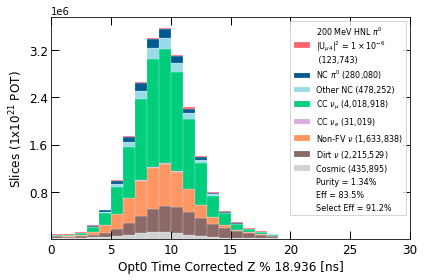

In [41]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]",
                    ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_post_crumbs.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Fiducial Volume </h1>

<Figure size 432x288 with 0 Axes>

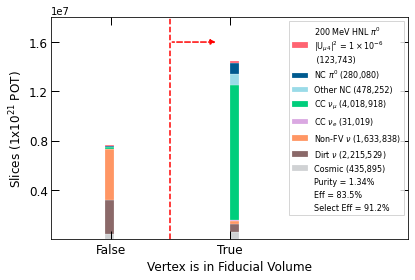

In [42]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_is_fv', 
                    xmin = -0.5, xmax = 2.5, xnbin = 40,
                    xtitle = 'Vertex is in Fiducial Volume',
                     ifAddLegend = True, addLegend = label
                    )

plt.xticks(range(0, 2), labels=["False", "True"])

plt.axvline(x = 0.5, c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(0.5, 1.6e7), xytext=(0.9, 1.6e7)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 1.8e7)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"fv_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Apply Cut</h3>

In [43]:
if ifCut:
    df_hnl = cutFV(df_hnl)
    df_nu = cutFV(df_nu)
    df_cos = cutFV(df_cos)

<h3>Save Purity/Eff</h3>

In [44]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Vertex In FV")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6]
[99.4, 96.1, 91.2, 65.7]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV']


<h1> Make Beam Bucket - Post FV</h1>

<Figure size 432x288 with 0 Axes>

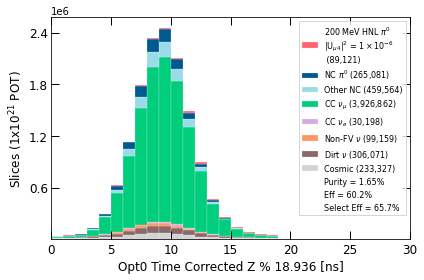

In [45]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]",
                     ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_post_FV.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Containment</h1>

<h3>Apply Cut</h3>

<h3>Save Purity/Eff</h3>

<h1> Make Beam Bucket - Post Containment</h1>

In [46]:
print(len(df_nu[df_nu['slc_true_event_type'] == 9]))
print(len(df_hnl[df_hnl['slc_true_event_type'] == 9]))
print(len(df_cos[df_cos['slc_true_event_type'] == 9]))

23015
2466
5834


<h1>Muon Rejection</h1>

<Figure size 432x288 with 0 Axes>

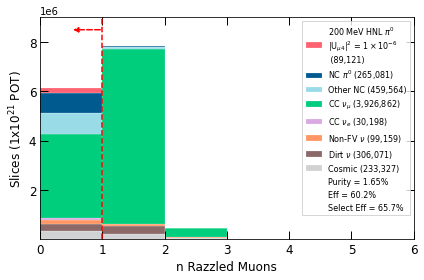

<Figure size 432x288 with 0 Axes>

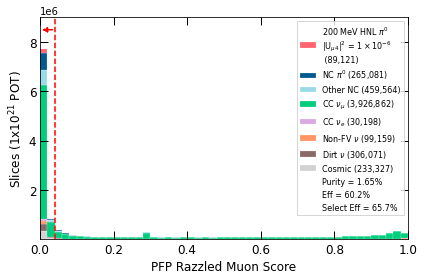

In [47]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_muons', 
                    xmin = 0, xmax = 6, xnbin = 6,
                    xtitle = 'n Razzled Muons',
                     ifAddLegend = True, addLegend = label
                    )

plt.axvline(x = 1, c = 'r', linestyle = '--', lw = 1.5)
plt.annotate("", xy=(0.5, 8.5e6), xytext=(1, 8.5e6)
             , arrowprops=dict(arrowstyle= '-|>',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 9e6)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_muon_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_muon_score', 
                    xmin = 0, xmax = 1, xnbin = 50,
                    xtitle = 'PFP Razzled Muon Score',
                     ifAddLegend = True, addLegend = label
                    )
plt.axvline(x =  TuneCut['Muon'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(0.0, 8.5e6), xytext=(0.04, 8.5e6)
             , arrowprops=dict(arrowstyle= '-|>',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 9e6)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_muon_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [48]:
if ifTune:
    vary_MuonScore(df_hnl, df_nu, df_cos , true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/muon_tuning.png", dpi =200)

<h3> Apply Cut</h3>

In [49]:
muonScore = TuneCut['Muon']

print(muonScore)

if ifCut:
    df_hnl = cutMuon(df_hnl, muonScore =muonScore)
    df_nu = cutMuon(df_nu, muonScore =muonScore)
    df_cos = cutMuon(df_cos,muonScore =muonScore)

0.04


<h3>Save Purity/Eff</h3>

In [50]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Muon Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0]
[99.4, 96.1, 91.2, 65.7, 50.8]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut']


<h1> Make Beam Bucket - Post Muon</h1>

<Figure size 432x288 with 0 Axes>

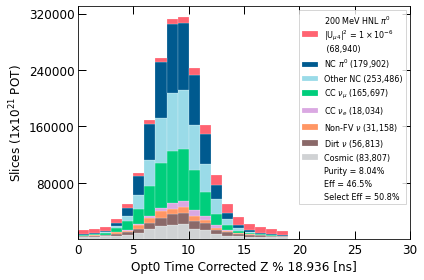

In [51]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]",
                     ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postmuon.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Proton Rejection</h1>

<Figure size 432x288 with 0 Axes>

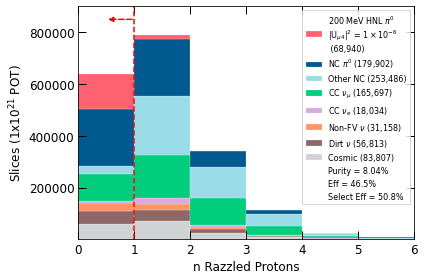

<Figure size 432x288 with 0 Axes>

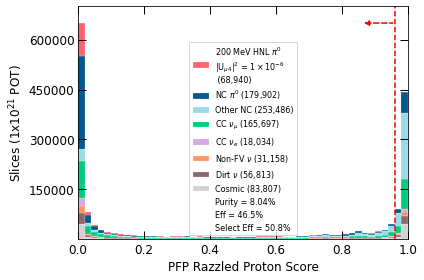

In [52]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_protons_thresh', 
                    xmin = 0, xmax = 6, xnbin = 6,
                    xtitle = 'n Razzled Protons',
                     ifAddLegend = True, addLegend = label
                    )

plt.axvline(x = 1, c = 'r', linestyle = '--', lw = 1.5)
plt.annotate("", xy=(0.5, 8.5e5), xytext=(1, 8.5e5)
             , arrowprops=dict(arrowstyle= '-|>',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 9e5)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_proton_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_proton_score', 
                    xmin = 0, xmax = 1, xnbin = 50,
                    xtitle = 'PFP Razzled Proton Score',
                      ifAddLegend = True, addLegend = label
                    )

plt.axvline(x =  TuneCut['Proton'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['Proton'], 6.5e5), xytext=(TuneCut['Proton'] - 0.1, 6.5e5)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 7e5)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_proton_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [53]:
if ifTune:
    vary_ProtonScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/proton_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [54]:
protonScore = TuneCut['Proton']

print(protonScore)

if ifCut:
    df_hnl = cutProton(df_hnl, nProton = 0, protonScore = protonScore)
    df_nu = cutProton(df_nu, nProton = 0, protonScore = protonScore)
    df_cos = cutProton(df_cos, nProton = 0, protonScore = protonScore)

0.96


<h3>Save Purity/Eff</h3>

In [55]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Proton Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0, 22.7]
[99.4, 96.1, 91.2, 65.7, 50.8, 47.7]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut']


<h1> Make Beam Bucket - Post Proton</h1>

<Figure size 432x288 with 0 Axes>

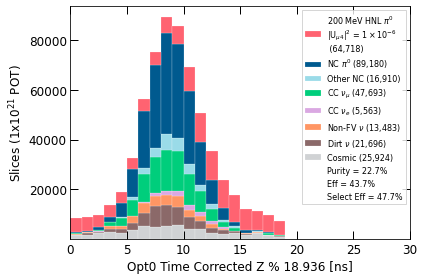

In [56]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]",
                 ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postproton.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Pion Rejection</h1>

<Figure size 432x288 with 0 Axes>

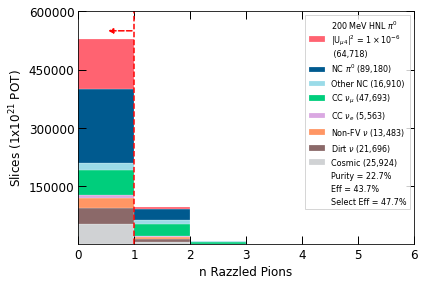

<Figure size 432x288 with 0 Axes>

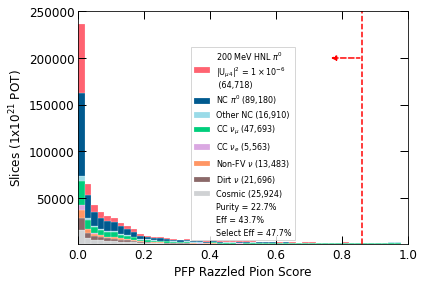

In [57]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_pions_thresh', 
                    xmin = 0, xmax = 6, xnbin = 6,
                    xtitle = 'n Razzled Pions',
                      ifAddLegend = True, addLegend = label
                    )

plt.axvline(x = 1, c = 'r', linestyle = '--', lw = 1.5)
plt.annotate("", xy=(0.5, 5.5e5), xytext=(1, 5.5e5)
             , arrowprops=dict(arrowstyle= '-|>',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 6e5)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_pion_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_pion_score', 
                    xmin = 0, xmax = 1, xnbin = 50,
                    xtitle = 'PFP Razzled Pion Score',
                      ifAddLegend = True, addLegend = label
                    )

plt.axvline(x =  TuneCut['Pion'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['Pion'], 2e5), xytext=(TuneCut['Pion'] - 0.1, 2e5)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 2.5e5)

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_pion_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [58]:
if ifTune:
    vary_PionScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/pion_tuning.png", dpi =200)

<h3>Apply Cut </h3>

In [59]:
pionScore = TuneCut['Pion']

print(pionScore)

if ifCut:
    df_hnl = cutPion(df_hnl, nPion = 0, pionScore = pionScore)
    df_nu = cutPion(df_nu, nPion = 0, pionScore = pionScore)
    df_cos = cutPion(df_cos, nPion = 0, pionScore = pionScore)

0.86


<h3>Save Purity/Eff</h3>

In [60]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Pion Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0, 22.7, 25.9]
[99.4, 96.1, 91.2, 65.7, 50.8, 47.7, 45.9]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut']


<h1> Make Beam Bucket - Post Pion</h1>

<Figure size 432x288 with 0 Axes>

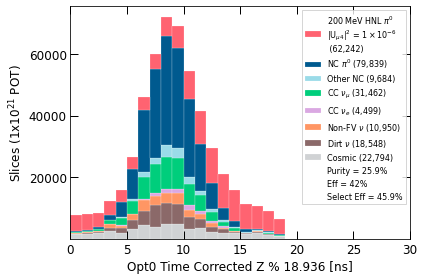

In [61]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]",
                     ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postpion.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Electron Rejection</h1>

<h3> Get Primary Shower </h3>

In [62]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<h3> Primary Shower </h3>

<Figure size 432x288 with 0 Axes>

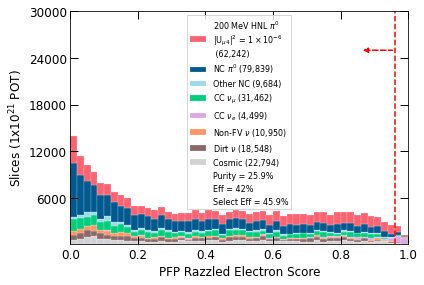

In [63]:
#----------------------------------------------
plot_slc_var(df_hnl_prim[df_hnl_prim['slc_pfp_razzled_electron_score'] < 2]
            , df_nu_prim[df_nu_prim['slc_pfp_razzled_electron_score'] < 2]
             , df_cos_prim[df_cos_prim['slc_pfp_razzled_electron_score'] < 2],
                    true_counts, start_counts, 
                    'slc_pfp_razzled_electron_score', 
                    xmin = 0, xmax = 1, xnbin = 50,
                    xtitle = 'PFP Razzled Electron Score',
                  ifAddLegend = True, addLegend = label
                    )

plt.axvline(x =  TuneCut['Electron'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['Electron'], 2.5e4), xytext=(TuneCut['Electron'] - 0.1, 2.5e4)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 3e4)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_electron_score_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Apply Cut </h3>

In [64]:
eScore = TuneCut['Electron']

print(eScore)

if ifCut:
    df_hnl_prim = cutElectronLess(df_hnl_prim, ifnElectron = False, electronScore = eScore)
    df_nu_prim = cutElectronLess(df_nu_prim, ifnElectron = False, electronScore = eScore)
    df_cos_prim = cutElectronLess(df_cos_prim, ifnElectron = False, electronScore = eScore)

0.96


In [65]:
df_hnl = merge_df_prim(df_hnl, df_hnl_prim)

df_nu = merge_df_prim(df_nu, df_nu_prim)

df_cos = merge_df_prim(df_cos, df_cos_prim)

<h3>Save Purity/Eff</h3>

In [66]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Electron Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0, 22.7, 25.9, 26.0]
[99.4, 96.1, 91.2, 65.7, 50.8, 47.7, 45.9, 44.7]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Electron Cut']


<h1> Make Beam Bucket - Post Electron</h1>

<Figure size 432x288 with 0 Axes>

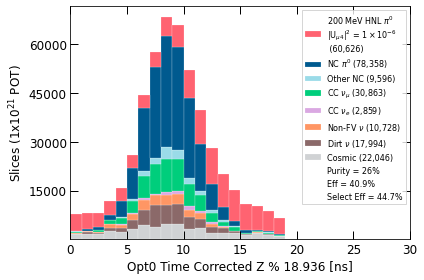

In [67]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]",
                     ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postelectron.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Photon Selection (?)</h1>

<h3> Get Primary Shower </h3>

In [68]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<Figure size 432x288 with 0 Axes>

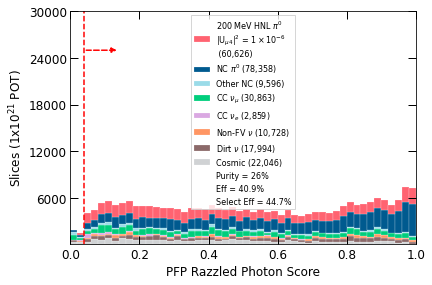

In [69]:
#----------------------------------------------
plot_slc_var(df_hnl_prim[df_hnl_prim['slc_pfp_razzled_photon_score'] < 2]
            , df_nu_prim[df_nu_prim['slc_pfp_razzled_photon_score'] < 2]
             , df_cos_prim[df_cos_prim['slc_pfp_razzled_photon_score'] < 2],
                    true_counts, start_counts, 
                    'slc_pfp_razzled_photon_score', 
                    xmin = 0, xmax = 1, xnbin = 50,
                    xtitle = 'PFP Razzled Photon Score',
                     ifAddLegend = True, addLegend = label
                    )

plt.axvline(x =  TuneCut['Photon'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['Photon'], 2.5e4), xytext=(TuneCut['Photon'] + 0.1, 2.5e4)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 3e4)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_photon_score_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Apply Cut </h3>

In [70]:
pScore = TuneCut['Photon']

print(pScore)

if ifCut:
    df_hnl_prim = cutPhotonMore(df_hnl_prim, ifnPhoton = False, photonScore = pScore)
    df_nu_prim = cutPhotonMore(df_nu_prim, ifnPhoton = False, photonScore = pScore)
    df_cos_prim = cutPhotonMore(df_cos_prim, ifnPhoton = False, photonScore = pScore)

0.04


In [71]:
df_hnl = merge_df_prim(df_hnl, df_hnl_prim)

df_nu = merge_df_prim(df_nu, df_nu_prim)

df_cos = merge_df_prim(df_cos, df_cos_prim)

<h3>Save Purity/Eff</h3>

In [72]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Photon Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0, 22.7, 25.9, 26.0, 27.0]
[99.4, 96.1, 91.2, 65.7, 50.8, 47.7, 45.9, 44.7, 42.9]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Electron Cut', 'Photon Cut']


<h1> Make Beam Bucket - Post Photon</h1>

<Figure size 432x288 with 0 Axes>

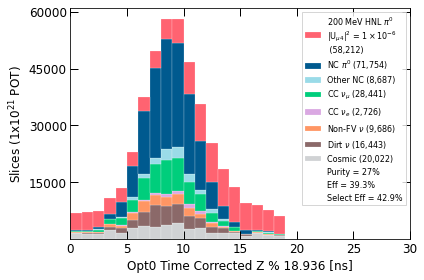

In [73]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]",
                     ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postphoton.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Opt0 Measured PE </h1>

<h3>Both 1 and 2+ Shower in Slice</h3>

<Figure size 432x288 with 0 Axes>

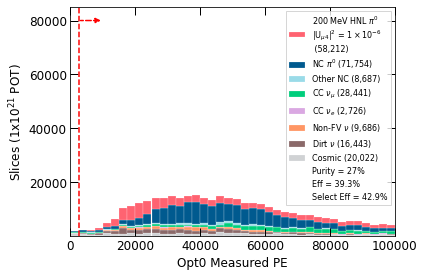

In [74]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_measPE', 
                    xmin = 0, xmax = 100000, xnbin = 40,
                    xtitle = 'Opt0 Measured PE',
                      ifAddLegend = True, addLegend = label
                    )

plt.axvline(x =  TuneCut['PE'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['PE'], 8e4), xytext=(TuneCut['PE'] + 7500, 8e4)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 8.5e4)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0PE_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Split 1 and 2+ shower cases </h3>

In [75]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> 1 shower cases </h3>

<Figure size 432x288 with 0 Axes>

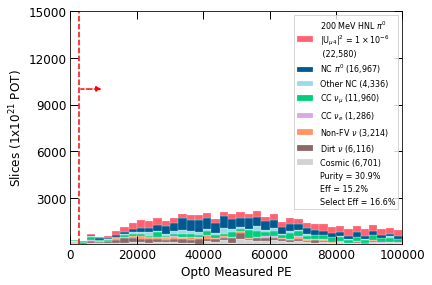

In [76]:
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
                    true_counts, start_counts, 
                    'slc_opt0_measPE', 
                    xmin = 0, xmax = 100000, xnbin = 40,
                    xtitle = 'Opt0 Measured PE',
                      ifAddLegend = True, addLegend = label
                    )

plt.axvline(x =  TuneCut['PE'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['PE'], 1e4), xytext=(TuneCut['PE'] + 7500, 1e4)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 1.5e4)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_opt0PE_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> 2+ shower cases </h3>

<Figure size 432x288 with 0 Axes>

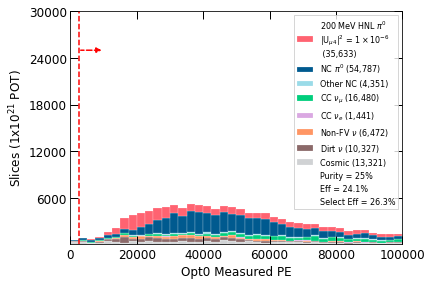

In [77]:
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
                    true_counts, start_counts, 
                    'slc_opt0_measPE', 
                    xmin = 0, xmax = 100000, xnbin = 40,
                    xtitle = 'Opt0 Measured PE',
                     ifAddLegend = True, addLegend = label
                    )

plt.axvline(x =  TuneCut['PE'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['PE'], 2.5e4), xytext=(TuneCut['PE'] + 7500, 2.5e4)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 3e4)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_opt0PE_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Apply Cut</h3>

In [78]:
PE = TuneCut['PE']

print(PE)

if ifCut:
    df_hnl = df_hnl[df_hnl['slc_opt0_measPE'] >= PE]
    df_nu = df_nu[df_nu['slc_opt0_measPE'] >= PE]
    df_cos = df_cos[df_cos['slc_opt0_measPE'] >= PE]

2500


<h3>Save Purity/Eff</h3>

In [79]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Minimum PE")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0, 22.7, 25.9, 26.0, 27.0, 27.1]
[99.4, 96.1, 91.2, 65.7, 50.8, 47.7, 45.9, 44.7, 42.9, 42.9]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Electron Cut', 'Photon Cut', 'Minimum PE']


<h1> Make Beam Bucket - Post PE</h1>

<Figure size 432x288 with 0 Axes>

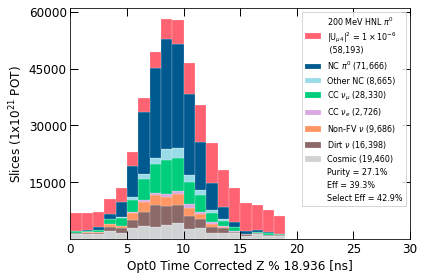

In [80]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]",
                    ifAddLegend = True, addLegend = label
                         )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postPE.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Shower Energy, dEdx and Conversion Gap</h1>

<h3> Primary Showers of both 1 and 2+ shower cases </h3>

<Figure size 432x288 with 0 Axes>

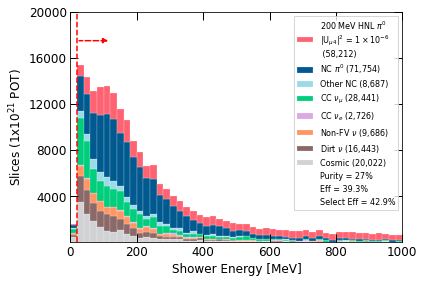

<Figure size 432x288 with 0 Axes>

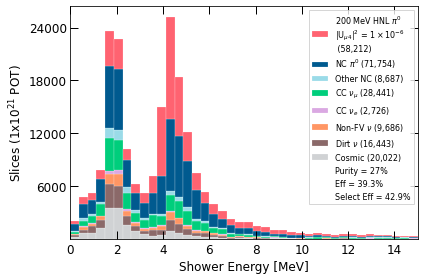

<Figure size 432x288 with 0 Axes>

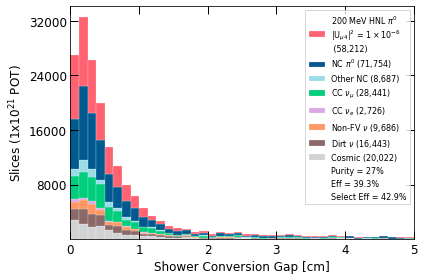

In [81]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    xmin = 0, xmax = 1000, xnbin = 50,
                    xtitle = 'Shower Energy [MeV]',
                      ifAddLegend = True, addLegend = label
                         )

plt.axvline(x =  TuneCut['ShowerEnergy'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['ShowerEnergy'], 1.75e4), xytext=(TuneCut['ShowerEnergy'] + 100, 1.75e4)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 2e4)

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"prim_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

#================================================#
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_dedx', 
                    xmin = 0, xmax = 15, xnbin = 40,
                    xtitle = 'Shower Energy [MeV]',
                      ifAddLegend = True, addLegend = label
                         )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"prim_shower_dedx_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()    
    
#================================================#
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]',
                      ifAddLegend = True, addLegend = label
                         )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"prim_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Split into 1 shower and multi shower case </h3>

In [82]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> Primary Showers of 1 shower cases </h3>

<Figure size 432x288 with 0 Axes>

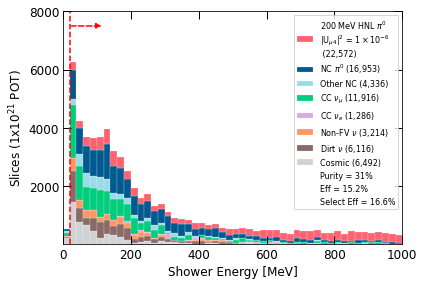

<Figure size 432x288 with 0 Axes>

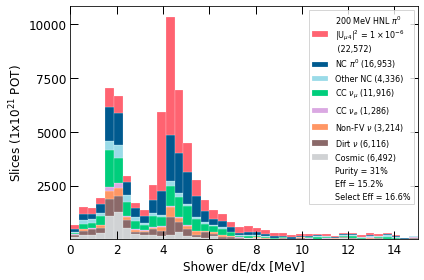

<Figure size 432x288 with 0 Axes>

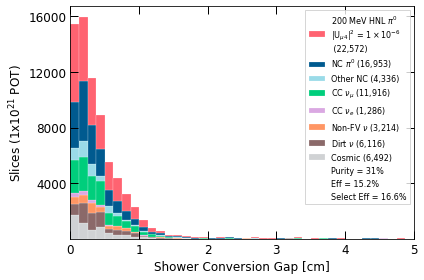

In [83]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    xmin = 0, xmax = 1000, xnbin = 50,
                    xtitle = 'Shower Energy [MeV]',
                      ifAddLegend = True, addLegend = label
                         )

plt.axvline(x =  TuneCut['ShowerEnergy'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['ShowerEnergy'], 7.5e3), xytext=(TuneCut['ShowerEnergy'] + 100,  7.5e3)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 8e3)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()
#================================================#
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_dedx', 
                    xmin = 0, xmax = 15, xnbin = 40,
                    xtitle = 'Shower dE/dx [MeV]',
                      ifAddLegend = True, addLegend = label
                         )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_dedx_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()    
    
#================================================#
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]',
                      ifAddLegend = True, addLegend = label
                         )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Primary Showers of 2+ shower cases </h3>

In [84]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

In [85]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)
#df_cos_prim_shw2 = get_primary_shw_df(df_cos)

<Figure size 432x288 with 0 Axes>

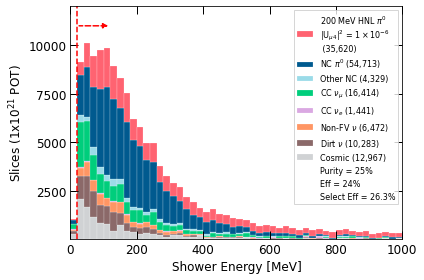

<Figure size 432x288 with 0 Axes>

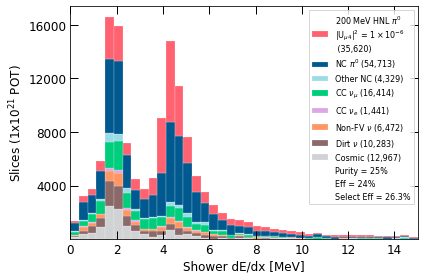

<Figure size 432x288 with 0 Axes>

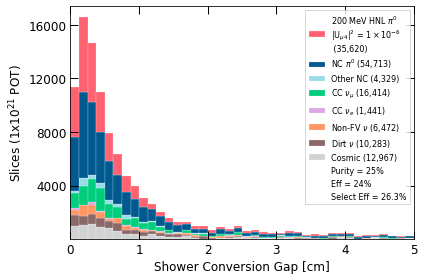

In [86]:
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    xmin = 0, xmax = 1000, xnbin = 50,
                    xtitle = 'Shower Energy [MeV]',
                      ifAddLegend = True, addLegend = label
                         )

plt.axvline(x =  TuneCut['ShowerEnergy'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['ShowerEnergy'], 1.1e4), xytext=(TuneCut['ShowerEnergy'] + 100,  1.1e4)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 1.2e4)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_prim_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

#================================================#
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'slc_pfp_shower_dedx', 
                    xmin = 0, xmax = 15, xnbin = 40,
                    xtitle = 'Shower dE/dx [MeV]',
                      ifAddLegend = True, addLegend = label
                         )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_prim_shower_dedx_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()    
    
#================================================#
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]',
                      ifAddLegend = True, addLegend = label
                         )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_prim_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Apply Cut</h3>

In [87]:
energy = TuneCut['ShowerEnergy']

print(energy)

if ifCut:
    df_hnl_prim = df_hnl_prim[df_hnl_prim['slc_pfp_shower_energy'] >= energy]
    df_nu_prim = df_nu_prim[df_nu_prim['slc_pfp_shower_energy'] >= energy]
    df_cos_prim = df_cos_prim[df_cos_prim['slc_pfp_shower_energy'] >= energy]

20


In [88]:
df_hnl = merge_df_prim(df_hnl, df_hnl_prim)

df_nu = merge_df_prim(df_nu, df_nu_prim)

df_cos = merge_df_prim(df_cos, df_cos_prim)

<h3>Save Purity/Eff</h3>

In [89]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Minimum Energy")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0, 22.7, 25.9, 26.0, 27.0, 27.1, 27.2]
[99.4, 96.1, 91.2, 65.7, 50.8, 47.7, 45.9, 44.7, 42.9, 42.9, 42.9]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Electron Cut', 'Photon Cut', 'Minimum PE', 'Minimum Energy']


<h1> Make Beam Bucket - Post Shower Energy</h1>

<Figure size 432x288 with 0 Axes>

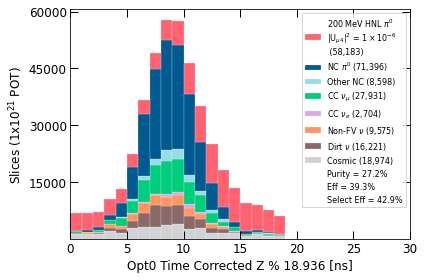

In [90]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',
                    ifAddLegend = True, addLegend = label
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postShwE.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Opt0 Frac </h1>

<h3>Both 1 and 2+ Shower in Slice</h3>

<Figure size 432x288 with 0 Axes>

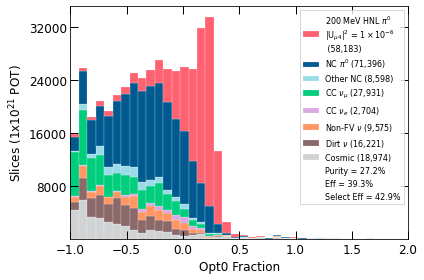

In [91]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [92]:
if ifTune:
    vary_OpT0FracMore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_one_shw_tuning.png", dpi =200)

<h3> Split 1 and 2+ shower cases </h3>

In [93]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> 1 shower cases </h3>

<Figure size 432x288 with 0 Axes>

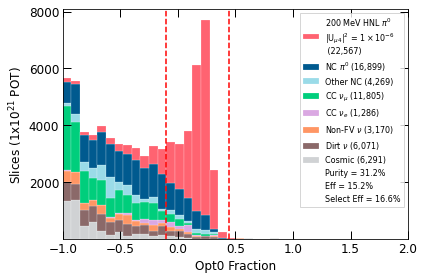

In [94]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction',
                  ifAddLegend = True, addLegend = label
                    )
plt.axvline(x =  TuneCut['OneShowerFracMore'], c = 'r', linestyle = '--')
plt.axvline(x =  TuneCut['OneShowerFracLess'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_one_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [95]:
if ifTune:
    vary_OpT0FracMore(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_one_shw_tuning.png", dpi =200)

In [96]:
if ifTune:
    vary_OpT0FracLess(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_less_one_shw_tuning.png", dpi =200)

<h3> 2+ shower cases </h3>

<Figure size 432x288 with 0 Axes>

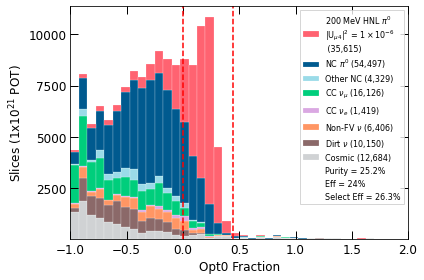

In [97]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction',
                  ifAddLegend = True, addLegend = label
                    )
plt.axvline(x =  TuneCut['TwoShowerFracMore'], c = 'r', linestyle = '--')
plt.axvline(x =  TuneCut['TwoShowerFracLess'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_two_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [98]:
if ifTune:
    vary_OpT0FracMore(df_hnl_shw2, df_nu_shw2, df_cos_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_two_shw_tuning.png", dpi =200)

In [99]:
if ifTune:
    vary_OpT0FracLess(df_hnl_shw2, df_nu_shw2, df_cos_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_less_two_shw_tuning.png", dpi =200)

<h3> Apply Cut </h3>

<h3> 1 shower only: harsh cut</h3>

In [100]:
fracMore = TuneCut['OneShowerFracMore']
print(fracMore)
fracLess = TuneCut['OneShowerFracLess']
print(fracLess)

if ifCut:
    df_hnl_shw1 = cutOpt0Frac(df_hnl_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_nu_shw1 = cutOpt0Frac(df_nu_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_cos_shw1 = cutOpt0Frac(df_cos_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)

-0.1
0.44


<h3> 2+ showers: cut on primary + less harsh cut </h3>

In [101]:
#fracMore = TuneCut['Opt0FracMore']
fracMore = TuneCut['TwoShowerFracMore']
print(fracMore)
fracLess = TuneCut['TwoShowerFracLess']
print(fracLess)

if ifCut:
    df_hnl_shw2 = cutOpt0Frac(df_hnl_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_nu_shw2 = cutOpt0Frac(df_nu_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_cos_shw2 = cutOpt0Frac(df_cos_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)

0
0.44


In [102]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)

df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)

df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [103]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Opt0 Fraction Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0, 22.7, 25.9, 26.0, 27.0, 27.1, 27.2, 69.3]
[99.4, 96.1, 91.2, 65.7, 50.8, 47.7, 45.9, 44.7, 42.9, 42.9, 42.9, 34.7]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Electron Cut', 'Photon Cut', 'Minimum PE', 'Minimum Energy', 'Opt0 Fraction Cut']


<h1> Make Beam Bucket - Post Opt0 Frac</h1>

<Figure size 432x288 with 0 Axes>

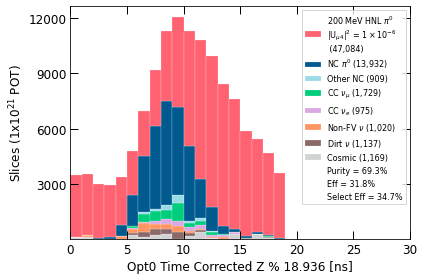

In [104]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postopt0.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Shower Theta</h1>

<h3> Get Primary Shower </h3>

In [105]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<h3> Primary Showers of both 1 and 2+ shower cases </h3>

<Figure size 432x288 with 0 Axes>

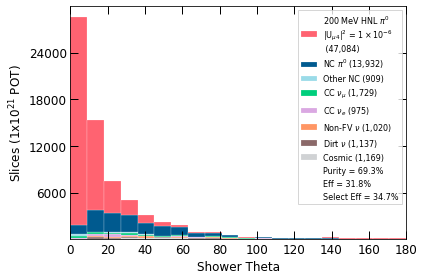

In [106]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


<h3> Split 1 and 2+ shower cases </h3>

In [107]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> Primary Showers of 1 shower cases </h3>

<Figure size 432x288 with 0 Axes>

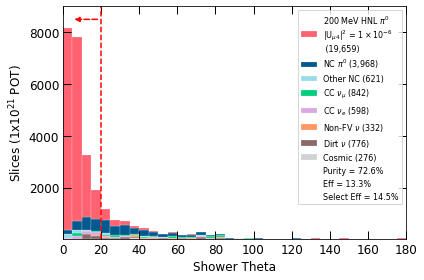

In [108]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    xmin = 0, xmax = 180, xnbin = 36,
                    xtitle = 'Shower Theta',
                  ifAddLegend = True, addLegend = label
                    )

plt.axvline(x =  TuneCut['OneShowerTheta'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['OneShowerTheta'], 8.5e3), xytext=(TuneCut['OneShowerTheta'] - 15, 8.5e3)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 9e3)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


In [109]:
if ifTune:
    vary_Theta(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/one_shower_theta_tuning.png", dpi =200)

<h3> Primary Showers of 2+ shower cases </h3>

In [110]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

In [111]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)

<Figure size 432x288 with 0 Axes>

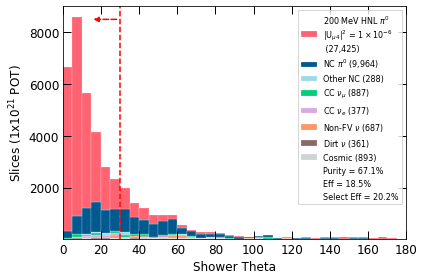

In [112]:
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    xmin = 0, xmax = 180, xnbin = 36,
                    xtitle = 'Shower Theta',
                  ifAddLegend = True, addLegend = label
                    )


plt.axvline(x =  TuneCut['TwoShowerTheta'], c = 'r', linestyle = '--', lw = 1.5)

plt.annotate("", xy=(TuneCut['TwoShowerTheta'], 8.5e3), xytext=(TuneCut['TwoShowerTheta'] - 15, 8.5e3)
             , arrowprops=dict(arrowstyle= '<|-',
                             color='r',
                             lw=1.5,
                             ls='--'))
plt.ylim(0, 9e3)
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_primary_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


In [113]:
if ifTune:
    vary_Theta(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/two_shower_prim_theta_tuning.png", dpi =200)

<h3>Apply Cut</h3>

<h3> 1 shower only: harsh cut</h3>

In [114]:
angle = TuneCut['OneShowerTheta']
print(angle)

if ifCut:
    df_hnl_shw1 = cutThetaAngle(df_hnl_shw1, thetaAngle = angle) 
    df_nu_shw1 = cutThetaAngle(df_nu_shw1, thetaAngle = angle) 
    df_cos_shw1 = cutThetaAngle(df_cos_shw1, thetaAngle = angle) 
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

20


<h3> 2+ showers: cut on primary + less harsh cut </h3>

In [115]:
angle = TuneCut['TwoShowerTheta']

print(angle)

if ifCut:
    df_hnl_prim_shw2 = cutThetaAngle(df_hnl_prim_shw2, thetaAngle = angle) 
    df_nu_prim_shw2 = cutThetaAngle(df_nu_prim_shw2, thetaAngle = angle) 
    df_cos_prim_shw2 = cutThetaAngle(df_cos_prim_shw2, thetaAngle = angle) 
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

30


In [116]:
df_hnl_shw2 = merge_df_prim(df_hnl_shw2, df_hnl_prim_shw2)

df_nu_shw2 = merge_df_prim(df_nu_shw2, df_nu_prim_shw2)

df_cos_shw2 = merge_df_prim(df_cos_shw2, df_cos_prim_shw2)

In [117]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)

df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)

df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [118]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Shower Theta Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 0.5, 1.3, 1.6, 8.0, 22.7, 25.9, 26.0, 27.0, 27.1, 27.2, 69.3, 82.7]
[99.4, 96.1, 91.2, 65.7, 50.8, 47.7, 45.9, 44.7, 42.9, 42.9, 42.9, 34.7, 31.3]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Electron Cut', 'Photon Cut', 'Minimum PE', 'Minimum Energy', 'Opt0 Fraction Cut', 'Shower Theta Cut']


<h1> Make Beam Bucket - Post Shower Theta</h1>

<Figure size 432x288 with 0 Axes>

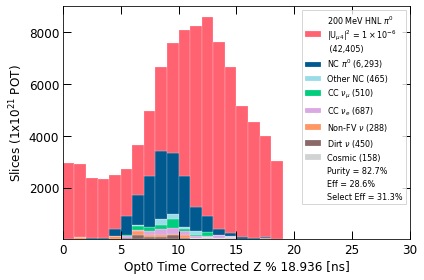

In [119]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',
                  ifAddLegend = True, addLegend = label
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postshowertheta.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>PFP N Hits</h1>

<Figure size 432x288 with 0 Axes>

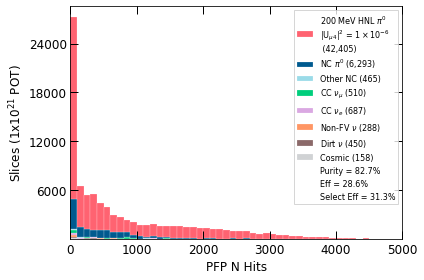

In [120]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_n_hits', 
                    xmin = 0, xmax = 5000, xnbin = 50,
                    xtitle = 'PFP N Hits',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"pfp_nhits.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Track Score</h1>

<Figure size 432x288 with 0 Axes>

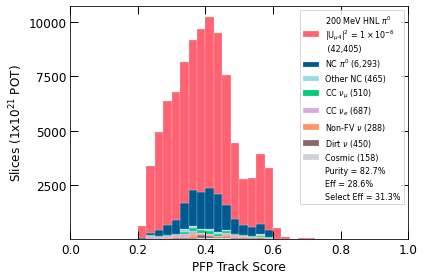

In [121]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_track_score', 
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Track Score',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"track_score.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Multiplicity</h1>

<Figure size 432x288 with 0 Axes>

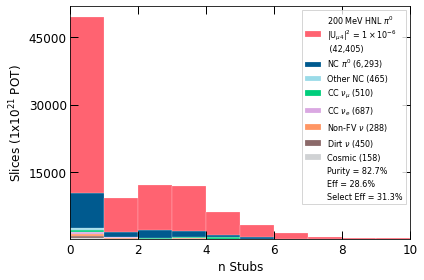

<Figure size 432x288 with 0 Axes>

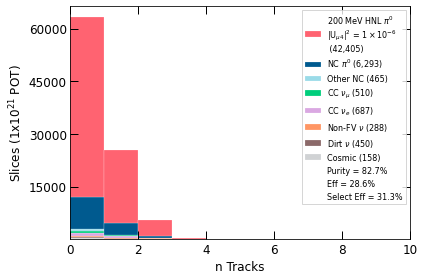

<Figure size 432x288 with 0 Axes>

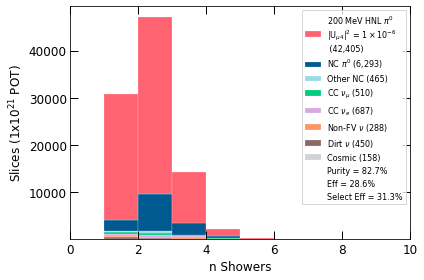

In [122]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_stub', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Stubs',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nStub.png", dpi = 200)
#-----------------------------------#
plt.show()

#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_trks', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Tracks',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nTrk.png", dpi = 200)
#-----------------------------------#
plt.show()

#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_shws', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Showers',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nShw.png", dpi = 200)
#-----------------------------------#
plt.show()

<Figure size 432x288 with 0 Axes>

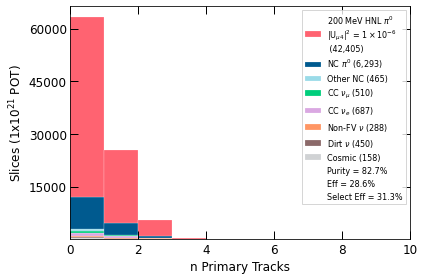

<Figure size 432x288 with 0 Axes>

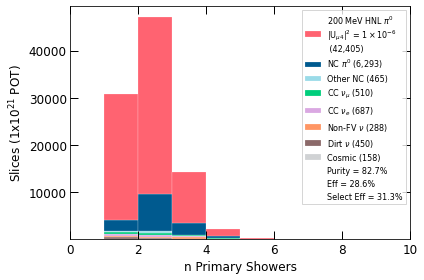

In [123]:
#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_primary_trks', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Primary Tracks',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nPrimaryTrk.png", dpi = 200)
#-----------------------------------#
plt.show()

#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_primary_shws', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Primary Showers',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nPrimaryShw.png", dpi = 200)
#-----------------------------------#
plt.show()

<Figure size 432x288 with 0 Axes>

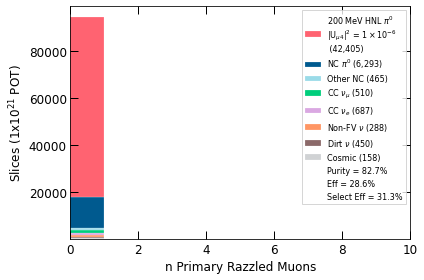

<Figure size 432x288 with 0 Axes>

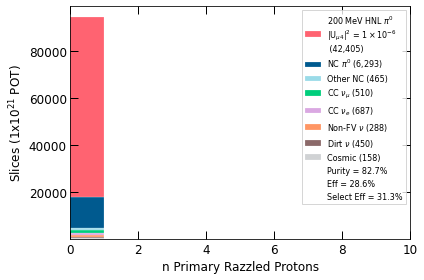

<Figure size 432x288 with 0 Axes>

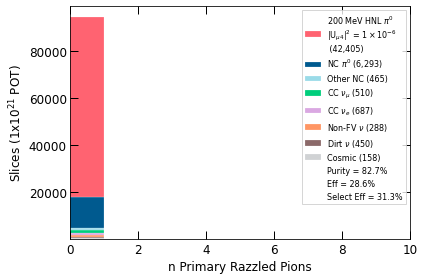

<Figure size 432x288 with 0 Axes>

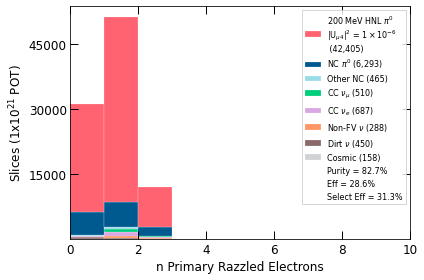

<Figure size 432x288 with 0 Axes>

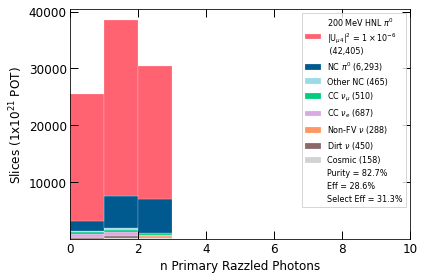

In [124]:
#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_primary_razzled_muons', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Primary Razzled Muons',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nPrimaryRazzledMuons.png", dpi = 200)
#-----------------------------------#
plt.show()

#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_primary_razzled_protons_thresh', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Primary Razzled Protons',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nPrimaryRazzledProtons.png", dpi = 200)
#-----------------------------------#
plt.show()

#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_primary_razzled_pions_thresh', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Primary Razzled Pions',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nPrimaryRazzledPions.png", dpi = 200)
#-----------------------------------#
plt.show()

#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_primary_razzled_electrons', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Primary Razzled Electrons',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nPrimaryRazzledElectrons.png", dpi = 200)
#-----------------------------------#
plt.show()

#==========================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_primary_razzled_photons', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Primary Razzled Photons',
                  ifAddLegend = True, addLegend = label
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nPrimaryRazzledPhotons.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>2 Shower Case: Pi0 Mass </h1>

<h3> Split into 1 shower and multi shower case again! </h3>

In [125]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

In [126]:
df_hnl_shw2['pi0_mass'] = df_hnl_shw2.apply(lambda row: pi0mass(row), axis = 1)

df_nu_shw2['pi0_mass'] = df_nu_shw2.apply(lambda row: pi0mass(row), axis = 1)

df_cos['pi0_mass']  = ""
#df_cos_shw2['pi0_mass'] = df_cos_shw2.apply(lambda row: pi0mass(row), axis = 1)


In [127]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

#df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)
#df_cos_prim_shw2 = get_primary_shw_df(df_cos)

<Figure size 432x288 with 0 Axes>

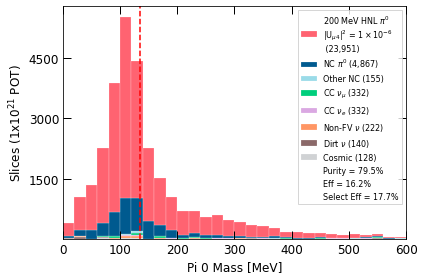

In [128]:
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos,
#plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'pi0_mass', 
                    xmin = 0, xmax = 600, xnbin = 30,
                    xtitle = 'Pi 0 Mass [MeV]',
                  ifAddLegend = True, addLegend = label
                    )
# only one line may be specified; full height
plt.axvline(x = 135, color = 'r', linewidth = 1.5, ls = '--')

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"pizero_mass_precut.png", dpi = 200)
#-----------------------------------#

plt.show()

<h1>Beam Bucket Final Distribution</h1>

<Figure size 432x288 with 0 Axes>

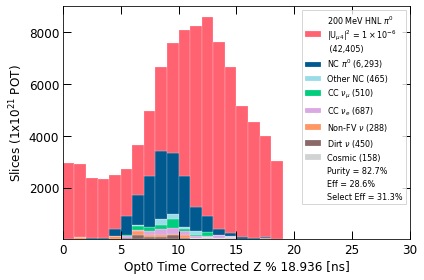

In [129]:
hist, bins = plot_slc_var(
                    df_hnl
                    , df_nu
                    , df_cos
                    , true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',
                  ifAddLegend = True, addLegend = label
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Plot Purity/Efficiency </h1>

In [130]:
print(eff_arr)
print(purity_arr)
print(cut_arr)

[99.4, 96.1, 91.2, 65.7, 50.8, 47.7, 45.9, 44.7, 42.9, 42.9, 42.9, 34.7, 31.3]
[0.4, 0.5, 1.3, 1.6, 8.0, 22.7, 25.9, 26.0, 27.0, 27.1, 27.2, 69.3, 82.7]
['Clear Cosmics Cut', 'Beam Spill', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Electron Cut', 'Photon Cut', 'Minimum PE', 'Minimum Energy', 'Opt0 Fraction Cut', 'Shower Theta Cut']


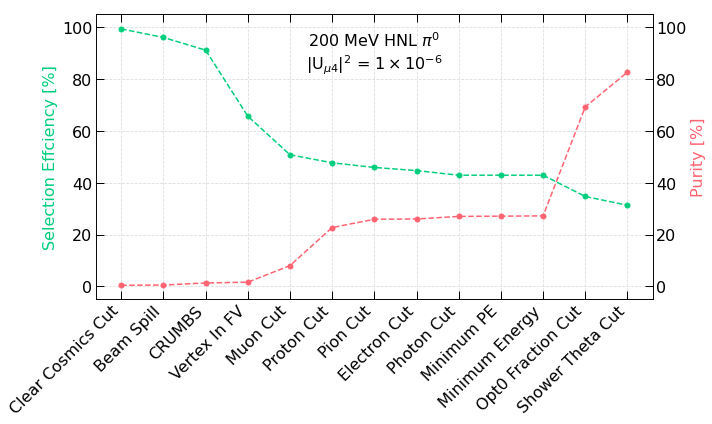

In [131]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), sharex = True)
ax2 = ax1.twinx()

t = np.arange(0, len(cut_arr) , 1)

effcol = col_dict['MintGreen']
pcol = col_dict['Flamingo']

ax1.plot(t, eff_arr, c = effcol, marker = 'o', markersize = 5, ls='--')
ax2.plot(t, purity_arr, c = pcol, marker = 'o', markersize = 5, ls='--')

ax1.set_ylim(-5,105)
ax2.set_ylim(-5,105)

ax1.grid(color='gainsboro', which='both', axis='both', linestyle='--')

ax1.set_ylabel("Selection Effciency [%]", c = effcol, fontsize = 16)
ax2.set_ylabel("Purity [%]", c = pcol, fontsize = 16)

plt.xticks(range(0, len(t)))
ax1.set_xticklabels(cut_arr, rotation = 45, ha="right", fontsize = 16)

ax1.tick_params(bottom = True, top = True, left = True, right = False)
ax2.tick_params(bottom = True, top = True, left = False, right = True)

ax1.tick_params(axis = 'x', labelsize = 16, direction = 'in')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'in')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'in')

ax1.set_title(label, y=1.0, pad=-55, fontsize = 16)
fig.tight_layout()

#-----------------------------------#
if ifSave:
    plt.savefig(savePath+"peff.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Save Only Primary Showers </h1>

In [132]:
df_hnl = get_primary_shw_df(df_hnl)

df_nu = get_primary_shw_df(df_nu)

df_cos = get_primary_shw_df(df_cos)
#df_cos_prim_shw2 = get_primary_shw_df(df_cos)

In [133]:
df_hnl[df_hnl['slc_true_event_type'] == 9]

,run,subrun,event,slc_id,slc_n_pfps,slc_vtx_x,slc_vtx_y,slc_vtx_z,slc_is_fv,slc_crumbs_score,...,slc_pfp_shower_energy,slc_pfp_shower_dedx,slc_pfp_shower_theta,slc_pfp_shower_phi,slc_pfp_shower_contained,scale_pot,simU,scaledU,mod_t,slc_opt0_time
3515,1,564,17,0,2,107.175133,-69.856758,36.587536,True,0.163059,...,128.741743,5.040021,19.082489,-81.515701,True,2.470706,1.000000e-07,0.000001,6.401509,1294.050729
7190,1,1157,9,1,2,62.659332,-86.644341,309.920319,True,0.342197,...,179.190111,4.587527,15.862559,3.240288,True,2.470706,1.000000e-07,0.000001,13.872521,1093.234859
7378,1,1185,34,1,2,23.817936,-22.525820,327.021332,True,0.233203,...,1443.543586,7.369097,9.689483,97.149521,True,2.470706,1.000000e-07,0.000001,12.625426,1413.900334
124,1,4,29,1,4,8.396193,60.628826,50.522987,True,0.201638,...,97.220758,1.657948,25.903769,2.579031,True,2.470706,1.000000e-07,0.000001,9.331405,1410.597091
2438,1,52,35,0,3,-78.162308,-152.737549,41.189072,True,0.421304,...,167.12786,1.569747,4.643188,45.840229,True,2.470706,1.000000e-07,0.000001,6.847886,669.609259
2653,1,56,33,0,3,-177.171295,-106.182465,102.250450,True,0.546997,...,222.633452,8.854852,8.778116,88.372375,True,2.470706,1.000000e-07,0.000001,13.065009,1565.820420
4119,1,85,32,0,3,146.138199,-110.442009,49.124878,True,0.335466,...,136.742518,1.951129,12.277157,-91.629646,True,2.470706,1.000000e-07,0.000001,1.403654,1554.157293
11786,1,236,27,0,4,-76.225037,-155.796936,120.687798,True,0.050655,...,82.388062,1.944067,25.753454,-167.508652,True,2.470706,1.000000e-07,0.000001,2.670456,1953.082481
17683,1,348,40,0,3,24.869469,151.823990,437.108887,True,0.240858,...,123.750904,6.519799,12.536325,-19.754471,True,2.470706,1.000000e-07,0.000001,1.792384,1156.902964
18406,1,365,40,1,4,95.012108,-129.876831,163.213135,True,0.573523,...,171.951082,3.784971,20.603088,61.040958,True,2.470706,1.000000e-07,0.000001,12.307395,826.560840


In [134]:
df_nu[df_nu['slc_true_event_type'] == 9]

,run,subrun,event,slc_id,index,slc_n_pfps,slc_vtx_x,slc_vtx_y,slc_vtx_z,slc_is_fv,...,slc_pfp_shower_length,slc_pfp_shower_open_angle,slc_pfp_shower_energy,slc_pfp_shower_dedx,slc_pfp_shower_theta,slc_pfp_shower_phi,slc_pfp_shower_contained,scale_pot,mod_t,slc_opt0_time
265,1,9968,49,3,1015110,2,-40.980141,130.440430,296.306244,True,...,64.200338,0.044553,185.913935,4.847074,16.494532,14.430187,True,22.164983,13.724627,562.878511
474,1,219,98,3,1334339,4,-25.966438,100.268814,220.475616,True,...,21.89362,0.108359,107.25112,2.212183,28.508055,119.989632,True,22.164983,14.248075,1150.415430
4444,1,6915,48,1,253587,4,174.466354,-139.631119,369.612579,True,...,36.317752,0.118063,94.797262,4.25245,29.750742,-126.674805,True,22.164983,12.871558,1565.635886
4761,1,8816,66,0,727178,3,-44.636566,125.202980,12.120048,True,...,84.282051,0.07209,279.646618,4.275152,11.139006,-16.142138,True,22.164983,11.264696,730.833101


In [135]:
df_cos

,run,subrun,event,slc_id,slc_n_pfps,slc_vtx_x,slc_vtx_y,slc_vtx_z,slc_is_fv,slc_crumbs_score,...,slc_pfp_shower_open_angle,slc_pfp_shower_energy,slc_pfp_shower_dedx,slc_pfp_shower_theta,slc_pfp_shower_phi,slc_pfp_shower_contained,scale_pot,mod_t,slc_opt0_time,pi0_mass


<h1> Save Cut Dataframe to Pickle</h1>

In [136]:
df_hnl.to_pickle("../pkl_files/v3_April2024/df_m"+str(m)+"_v3_hnl.pkl", protocol = 5)

In [137]:
df_nu.to_pickle("../pkl_files/v3_April2024/df_m"+str(m)+"_v3_nu.pkl", protocol = 5)

In [138]:
df_cos.to_pickle("../pkl_files/v3_April2024/df_m"+str(m)+"_v3_cos.pkl", protocol = 5)